# Hand Writing CNN

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## Dataset & Variables

In [2]:
# variables
batch_size = 128
num_classes = 10
epochs = 3

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

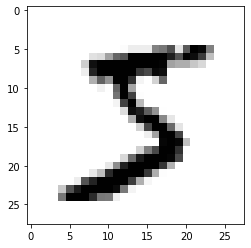

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

## Preprocessing

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
print('x_train.shape[0]', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrixs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

x_train.shape[0] (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Model Architecture

In [12]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\tenny\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


## Training

In [14]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [15]:
import time
start = time.time()

model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs, 
          verbose=1, 
          validation_data=(x_test, y_test))

end = time.time()
print(end - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 59s 983us/step - loss: 0.2560 - accuracy: 0.9214 - val_loss: 0.0544 - val_accuracy: 0.9824
Epoch 2/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0889 - accuracy: 0.9728 - val_loss: 0.0408 - val_accuracy: 0.9853
Epoch 3/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0674 - accuracy: 0.9802 - val_loss: 0.0315 - val_accuracy: 0.9879


## Testing

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.03154376347498037
Test accuracy:  0.9879000186920166


## Save the Model

In [17]:
model.save('mnist.model')